# Analysis of Nadini et. al. 
https://www.nature.com/articles/s41598-021-00053-8.pdf

### Part 0: Doing some data preparation and preliminary analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv('Data_API.csv')

/var/folders/h4/yg6gzmw51cg0v5p670_9dc2r0000gn/T/ipykernel_71837/1204357656.py:1: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('Data_API.csv')


In [7]:
size = dataframe.shape
print("Dataframe Size", size)
print("Dataframe Head", dataframe.head())

Dataframe Size (6071027, 24)
Dataframe Head   Smart_contract    ID_token  \
0            NaN  87094722.0   
1            NaN  73044643.0   
2            NaN  17107482.0   
3            NaN  82230857.0   
4            NaN  40925443.0   

                                    Transaction_hash  \
0  0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...   
1  0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...   
2  0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...   
3  0x3d157249e3083622c2d756f07a05caa3a76687288b32...   
4  0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...   

                               Seller_address Seller_username  \
0  0x76481caa104b5f6bccb540dae4cefaf1c398ebea             NaN   
1  0x76481caa104b5f6bccb540dae4cefaf1c398ebea             NaN   
2  0x76481caa104b5f6bccb540dae4cefaf1c398ebea             NaN   
3  0x76481caa104b5f6bccb540dae4cefaf1c398ebea             NaN   
4  0x76481caa104b5f6bccb540dae4cefaf1c398ebea             NaN   

                                Buy

In [15]:
print("Columns", dataframe.columns)

# getting all unique values in the column called "Collection"
print("Unique Values in Category", dataframe['Category'].unique())

Columns Index(['Smart_contract', 'ID_token', 'Transaction_hash', 'Seller_address',
       'Seller_username', 'Buyer_address', 'Buyer_username', 'Image_url_1',
       'Image_url_2', 'Image_url_3', 'Image_url_4', 'Price_Crypto', 'Crypto',
       'Price_USD', 'Name', 'Description', 'Collection', 'Market',
       'Datetime_updated', 'Datetime_updated_seconds', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')
Unique Values in Category ['Games' 'Art' 'Other' 'Collectible' 'Metaverse' 'Utility']


### Part 1: Description of NFT Marketplace
#### 1.1 Replicating Figure 1

In [29]:
# Correcting the datetime format
dataframe['Datetime_updated'] = pd.to_datetime(dataframe['Datetime_updated'])

# Creating new dataframes for each unique value in the column called "Category"
art_data = dataframe[dataframe['Category'] == 'Art']
collectible_data = dataframe[dataframe['Category'] == 'Collectible']
games_data = dataframe[dataframe['Category'] == 'Games']
metaverse_data = dataframe[dataframe['Category'] == 'Metaverse']
other_data = dataframe[dataframe['Category'] == 'Other']
utility_data = dataframe[dataframe['Category'] == 'Utility']

In [35]:
# A function to plot price data on a log scale
def plot_price_data(current_dataframe, title, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_yscale('log')
        ax.set_title(title)
    dataframe_day = current_dataframe.groupby(current_dataframe['Datetime_updated'].dt.date).sum()
    ax.plot(dataframe_day.index, dataframe_day['Price_USD'])

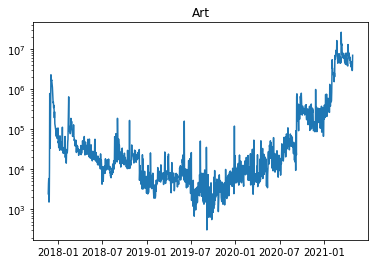

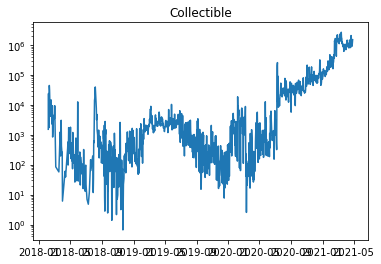

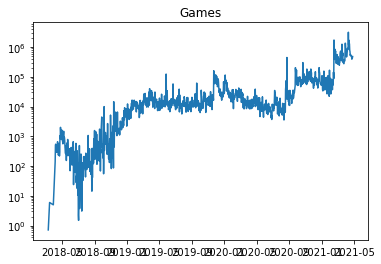

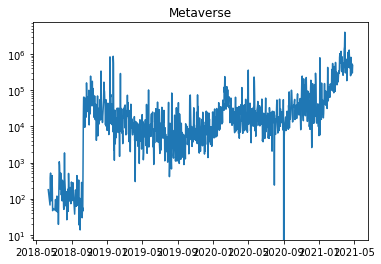

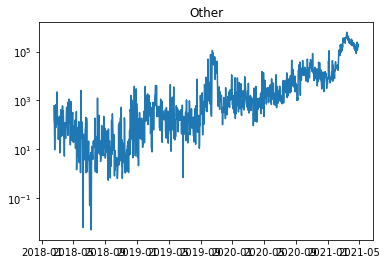

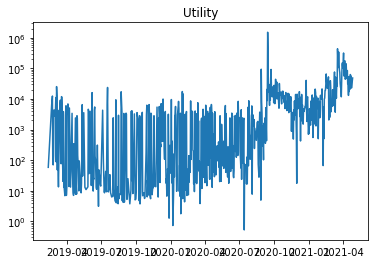

In [32]:
# Creating a new dataframe of day vs Price_USD for the category "Art" on a log scale
plot_price_data(art_data, "Art")
plot_price_data(collectible_data, "Collectible")
plot_price_data(games_data, "Games")
plot_price_data(metaverse_data, "Metaverse")
plot_price_data(other_data, "Other")
plot_price_data(utility_data, "Utility")

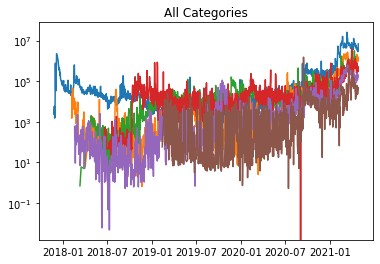

In [36]:
# plotting a list of dataframes on the same graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_title("All Categories")

plot_price_data(art_data, "Art", ax)
plot_price_data(collectible_data, "Collectible", ax)
plot_price_data(games_data, "Games", ax)
plot_price_data(metaverse_data, "Metaverse", ax)
plot_price_data(other_data, "Other", ax)
plot_price_data(utility_data, "Utility", ax)

In [40]:
# Summing the price data for each unique Collection_cleaned in each category
art_data_sum = art_data.groupby(art_data['Collection']).sum()
collectible_data_sum = collectible_data.groupby(collectible_data['Collection']).sum()
games_data_sum = games_data.groupby(games_data['Collection']).sum()
metaverse_data_sum = metaverse_data.groupby(metaverse_data['Collection']).sum()
other_data_sum = other_data.groupby(other_data['Collection']).sum()
utility_data_sum = utility_data.groupby(utility_data['Collection']).sum()

# getting the top 10 collections by price
art_data_sum_top10 = art_data_sum.nlargest(10, 'Price_USD')
collectible_data_sum_top10 = collectible_data_sum.nlargest(10, 'Price_USD')
games_data_sum_top10 = games_data_sum.nlargest(10, 'Price_USD')
metaverse_data_sum_top10 = metaverse_data_sum.nlargest(10, 'Price_USD')
other_data_sum_top10 = other_data_sum.nlargest(10, 'Price_USD')
utility_data_sum_top10 = utility_data_sum.nlargest(10, 'Price_USD')

#### 1.2 Replicating Figure 1 (The Top NFT Collections per Category)

In [43]:
print("Art data top 10", art_data_sum_top10)
print("Collectible data top 10", collectible_data_sum_top10)
print("Games data top 10", games_data_sum_top10)
print("Metaverse data top 10", metaverse_data_sum_top10)
print("Other data top 10", other_data_sum_top10)
print("Utility data top 10", utility_data_sum_top10)

Art data top 10                         Price_Crypto     Price_USD
Collection                                        
Cryptopunks             1.496969e+05  2.634816e+08
Rarible                 1.917020e+06  8.212941e+07
Hashmasks               5.478190e+05  4.741509e+07
Cryptokitties           1.196038e+05  3.954234e+07
Superrare               3.566416e+04  3.522466e+07
Art-blocks              3.213218e+04  1.570892e+07
Wrapped-mooncatsrescue  3.222499e+04  1.123693e+07
Autoglyphs              8.279856e+03  9.168126e+06
1111-by-kevin-abosch    3.953223e+03  7.773867e+06
Wrapped-cryptopunks     8.561098e+03  6.458603e+06
Collectible data top 10                                          Price_Crypto     Price_USD
Collection                                                         
Sorare                                   4.069990e+04  4.856276e+07
mlb.topps                                3.303557e+07  6.208778e+06
Bullrunbabestoken                        3.006804e+03  4.063449e+06
Waifusio

Note: We could not replicate figure 3 since that deals with secondary trades among the NFTs. The dataset provided by this paper does not contain secondary trades so this seems to not be possible for now.

### Part 2: Trader Analysis

#### 2.1 Trader Landscape for Art

Note: Since the size of the dataset was quite large, I wasn't able to replicate the network including the entire dataset, but used a subset of data to still get a sense of the network. We were able to get to a similar conclusion as the original paper.

In [142]:
import networkx as nx

def create_graph(art_data, first_collection, second_collection):
    # Making a networkx graph of the traders that traded in Cryptopunks and Rarible group
    art_trader_data = art_data[art_data["Collection"].isin([first_collection, second_collection])].head(1800)
    # Adding color for different Collection
    art_trader_data["color"] = art_trader_data["Collection"].apply(lambda x: "black" if x == first_collection else "blue")

    art_graph = nx.from_pandas_edgelist(art_trader_data, source="Seller_address", target="Buyer_address", edge_attr=["color", "Price_USD"])

    # Printing some information of the graph
    print("Art graph nodes", art_graph.number_of_nodes())
    print("Art graph edges", art_graph.number_of_edges())

    colors = nx.get_edge_attributes(art_graph, "color").values()
    weights = nx.get_edge_attributes(art_graph, "Price_USD").values()
    nx.draw(art_graph, pos=nx.spring_layout(art_graph), with_labels=False, node_size=5, node_color='red', edge_color=colors, width=3)

Art graph nodes 484
Art graph edges 1017


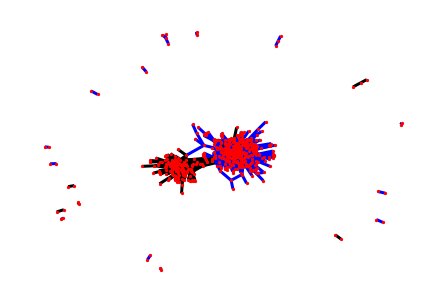

In [144]:
create_graph(art_data, "Cryptopunks", "Rarible")

Art graph nodes 308
Art graph edges 1040


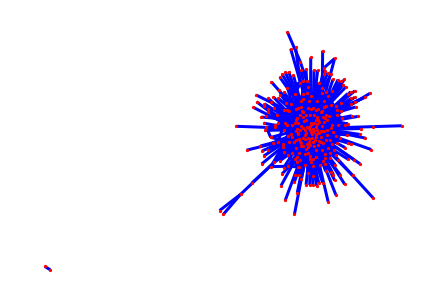

In [148]:
create_graph(art_data, "Crpytokitties", "Superrare")